Decision Trees

Method - Generate_Decision Tree(D,attribute_list)
create a node N #any nth node containing the current data set(means not empty)


#first condition
if all tuples in N belongs to the same class, mark it and return as leaf node #if all the entities in the node are of the same class
#(means it is classified) then make it a leaf node and return that node

#second condition- Attribute list is empty and so no fuuther splitting can be done and hence make a leaf node 
#and give it a class C1 if it contains in majority the entities of C1 (100,c1=80,c2=20)
if attribute list is empty 
return N labelled as majority class

#third condition - attributes are left for splitting and also the node doesnt have all the entities of the same class
splitting criterion=apply Attribute_Selection_Method(D,attribute_list): #returns a list of criterias on which the splitting is to be donebased on the best attribute selected by the function for further splitting.
#For example,Age is selected as the best attribute for the splitting and will return a list of criterias as young,middle,senior   
    if s_c id discrete valued:
        attribute_list=attribute_list-splitting_criterion #removed from attribute list so that it doesnt again chooses age as the spliting criterion
        for every j outcome of splitting_criterion: #splitting dataset in 3 criterion one by one calling the same function
            let Dj be set of tuples satisfying outcome j
            attach a node returned by Generate_Decision_Tree(Dj,attribute_list)
            

In [57]:
from sklearn import datasets
from sklearn import tree
import pydotplus
import numpy as np
import pandas as pd

In [58]:
iris=datasets.load_iris()
clf=tree.DecisionTreeClassifier()


In [59]:
clf.fit(iris.data,iris.target)

dot_data=tree.export_graphviz(clf,out_file=None,
                             feature_names=iris.feature_names,
                             class_names=iris.target_names,
                             filled=True,rounded=True,
                             special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris.pdf')

True

In [60]:
diabetes=datasets.load_diabetes()
clf=tree.DecisionTreeClassifier()

In [61]:
clf.fit(diabetes.data,diabetes.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [62]:
dot_data=tree.export_graphviz(clf,out_file=None,
                             #feature_names=iris.feature_names, features_names not available in diabetes
                             #class_names=iris.target_names, Class_names not avaible
                             filled=True,rounded=True,
                             special_characters=True)

In [63]:
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('diabetes.pdf')

True

Type of decision trees:
(1)C4.5
(2)CART(Classification...) - gini index(formula used to select the best attribute)
 Information Gain- entropy E(s)= -summation(i=1,N(number of classes)) Pi*log(Pi)..... Here Pi is probability of class i
    

In [64]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import ensemble

In [65]:
X,Y=make_blobs(n_samples=1000,n_features=1,centers=4,random_state=10) #n_features=1 kept so as to produce a graph

In [66]:
plt.scatter (X,Y)


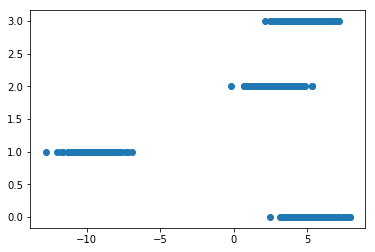

In [67]:
plt.show()

In [68]:
clf=ensemble.RandomForestClassifier()
clf.fit(X,Y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [69]:
score=clf.score(X,Y)
score

0.96499999999999997

In [70]:
from sklearn import cross_validation as cv
from sklearn.model_selection import cross_val_score

/Users/melon/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [71]:
X_Train,X_Test,Y_Train,Y_Test= cv.train_test_split(X,Y,test_size=0.2)

In [72]:
clf=ensemble.RandomForestClassifier()
clf.fit(X_Train,Y_Train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [73]:
score=cross_val_score(clf,X_Test,Y_Test,cv=5)
score

array([ 0.7804878 ,  0.7       ,  0.675     ,  0.725     ,  0.71794872])

In [74]:
score.mean()

0.71968730456535335

In [75]:
clfR=tree.DecisionTreeClassifier()
score=cross_val_score(clfR,X_Test,Y_Test,cv=5)
score

array([ 0.80487805,  0.725     ,  0.7       ,  0.7       ,  0.71794872])

In [76]:
score.mean()

0.72956535334584116

In [77]:
#Performing all the methods done above for Titanic Data set

In [78]:
import pandas as pd

In [79]:
titanic=pd.read_csv('titanic_train.csv')

In [80]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
del titanic["PassengerId"]
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
del titanic["Ticket"]
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [83]:
del titanic["Name"]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [84]:
del titanic["Fare"]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


In [85]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [86]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
Embarked      2
dtype: int64

In [87]:
del titanic["Cabin"]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [88]:
meanS=titanic[titanic["Survived"]==1].Age.mean()
meanS

28.343689655172415

In [89]:
import numpy as np

In [90]:
titanic["age"]=np.where(titanic["Age"].isnull() & titanic["Survived"]==1,meanS,titanic["Age"])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,age
0,0,3,male,22.0,1,0,S,22.0
1,1,1,female,38.0,1,0,C,38.0
2,1,3,female,26.0,0,0,S,26.0
3,1,1,female,35.0,1,0,S,35.0
4,0,3,male,35.0,0,0,S,35.0


In [91]:
meanNS=titanic[titanic["Survived"]==0].Age.mean()
meanNS

30.62617924528302

In [92]:
titanic["age"].fillna(meanNS,inplace=True)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,age
0,0,3,male,22.0,1,0,S,22.000000
1,1,1,female,38.0,1,0,C,38.000000
2,1,3,female,26.0,0,0,S,26.000000
3,1,1,female,35.0,1,0,S,35.000000
4,0,3,male,35.0,0,0,S,35.000000
5,0,3,male,NaN,0,0,Q,30.626179
6,0,1,male,54.0,0,0,S,54.000000
7,0,3,male,2.0,3,1,S,2.000000
8,1,3,female,27.0,0,2,S,27.000000
9,1,2,female,14.0,1,0,C,14.000000


In [93]:
del titanic["Age"]
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,age
0,0,3,male,1,0,S,22.0
1,1,1,female,1,0,C,38.0
2,1,3,female,0,0,S,26.0
3,1,1,female,1,0,S,35.0
4,0,3,male,0,0,S,35.0


In [94]:
titanic.rename(columns={'age':'Age'},inplace=True)
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age
0,0,3,male,1,0,S,22.0
1,1,1,female,1,0,C,38.0
2,1,3,female,0,0,S,26.0
3,1,1,female,1,0,S,35.0
4,0,3,male,0,0,S,35.0


In [95]:
titanic.dropna(inplace=True)
titanic

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age
0,0,3,male,1,0,S,22.000000
1,1,1,female,1,0,C,38.000000
2,1,3,female,0,0,S,26.000000
3,1,1,female,1,0,S,35.000000
4,0,3,male,0,0,S,35.000000
5,0,3,male,0,0,Q,30.626179
6,0,1,male,0,0,S,54.000000
7,0,3,male,3,1,S,2.000000
8,1,3,female,0,2,S,27.000000
9,1,2,female,1,0,C,14.000000


In [96]:
from sklearn import preprocessing

In [97]:
con=preprocessing.LabelEncoder()

In [98]:
titanic["Embarked"]=con.fit_transform(titanic["Embarked"])
titanic


,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age
0,0,3,male,1,0,2,22.000000
1,1,1,female,1,0,0,38.000000
2,1,3,female,0,0,2,26.000000
3,1,1,female,1,0,2,35.000000
4,0,3,male,0,0,2,35.000000
5,0,3,male,0,0,1,30.626179
6,0,1,male,0,0,2,54.000000
7,0,3,male,3,1,2,2.000000
8,1,3,female,0,2,2,27.000000
9,1,2,female,1,0,0,14.000000


In [99]:
titanic["Sex"]=con.fit_transform(titanic["Sex"])
titanic

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age
0,0,3,1,1,0,2,22.000000
1,1,1,0,1,0,0,38.000000
2,1,3,0,0,0,2,26.000000
3,1,1,0,1,0,2,35.000000
4,0,3,1,0,0,2,35.000000
5,0,3,1,0,0,1,30.626179
6,0,1,1,0,0,2,54.000000
7,0,3,1,3,1,2,2.000000
8,1,3,0,0,2,2,27.000000
9,1,2,0,1,0,0,14.000000


In [100]:
Y=titanic["Survived"]
Y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [101]:
del titanic["Survived"]
titanic.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age
0,3,1,1,0,2,22.0
1,1,0,1,0,0,38.0
2,3,0,0,0,2,26.0
3,1,0,1,0,2,35.0
4,3,1,0,0,2,35.0


In [102]:
clf=tree.DecisionTreeClassifier()

In [103]:
X_Train,X_Test,Y_Train,Y_Test=cv.train_test_split(titanic,Y,test_size=0.02)

In [104]:
clf.fit(X_Train,Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [105]:
dot_data=tree.export_graphviz(clf,out_file=None,
                             feature_names=titanic.columns,
                             #class_names=Y.columns,
                             filled=True,rounded=True,
                             special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('titanic.pdf')

True

In [106]:
score=cross_val_score(clf,titanic,Y,cv=5)
score

array([ 0.78651685,  0.83146067,  0.8258427 ,  0.84831461,  0.83050847])

In [107]:
score.mean()

0.82452866120738899

In [108]:
clfR=ensemble.RandomForestClassifier()

In [109]:
clfR.fit(X_Train,Y_Train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [110]:
scoreR=cross_val_score(clfR,titanic,Y,cv=5)
scoreR

array([ 0.76966292,  0.79775281,  0.85955056,  0.84831461,  0.82485876])

In [111]:
scoreR.mean()

0.82002793118771022

In [124]:
#implementing crossval score myself

titanic = titanic.sample(frac=1).reset_index(drop=True) #shuffling the data


In [125]:
data=titanic.as_matrix()


In [ ]:
def cross_val(data,cv):
    subsetLen= len(data)/cv
    
    a=np.array_split(data,subsetLen)
    score=[]
    clf=ensemble.RandomForestClassifier()
    for i in range(len(a)):
        
        
    
            
            
        
        
        

# # Decision Tree Code (Implementation)

KFold....
implement iris through Cross Validation and using loop 


Multi-Value Columns...Movie Genre..
Split into Differnt genre columns or or trying to produce an integer value using the three genre values for that movie.

In [113]:
iris= datasets.load_iris()
print(iris.data[:5,:])
iris.target[:5]


[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


array([0, 0, 0, 0, 0])

In [114]:
df = pd.DataFrame(np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [115]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [116]:
matrix=df.as_matrix(columns=None)
matrix

array([[ 5.1,  3.5,  1.4,  0.2,  0. ],
       [ 4.9,  3. ,  1.4,  0.2,  0. ],
       [ 4.7,  3.2,  1.3,  0.2,  0. ],
       [ 4.6,  3.1,  1.5,  0.2,  0. ],
       [ 5. ,  3.6,  1.4,  0.2,  0. ],
       [ 5.4,  3.9,  1.7,  0.4,  0. ],
       [ 4.6,  3.4,  1.4,  0.3,  0. ],
       [ 5. ,  3.4,  1.5,  0.2,  0. ],
       [ 4.4,  2.9,  1.4,  0.2,  0. ],
       [ 4.9,  3.1,  1.5,  0.1,  0. ],
       [ 5.4,  3.7,  1.5,  0.2,  0. ],
       [ 4.8,  3.4,  1.6,  0.2,  0. ],
       [ 4.8,  3. ,  1.4,  0.1,  0. ],
       [ 4.3,  3. ,  1.1,  0.1,  0. ],
       [ 5.8,  4. ,  1.2,  0.2,  0. ],
       [ 5.7,  4.4,  1.5,  0.4,  0. ],
       [ 5.4,  3.9,  1.3,  0.4,  0. ],
       [ 5.1,  3.5,  1.4,  0.3,  0. ],
       [ 5.7,  3.8,  1.7,  0.3,  0. ],
       [ 5.1,  3.8,  1.5,  0.3,  0. ],
       [ 5.4,  3.4,  1.7,  0.2,  0. ],
       [ 5.1,  3.7,  1.5,  0.4,  0. ],
       [ 4.6,  3.6,  1. ,  0.2,  0. ],
       [ 5.1,  3.3,  1.7,  0.5,  0. ],
       [ 4.8,  3.4,  1.9,  0.2,  0. ],
       [ 5. ,  3. ,  1.6,

In [117]:
def createTree(data,features):
    classList=[example[-1] for example in data] #negative index means you are counting from the right -1 meand extreme right, -2 next to that and so on    
    for i in range(len(classList)):
        if classList[0]!=classList[i]:
            break
    else:
        return classList[0]
    if len(features)==0:
        return majorityClass(classList)
    
    
    bestFeature=chooseBestFeature(data)
    label=chooselabel(bestFeture)
    
    
    
    

In [1]:
def sigmoid(m , x):
    return 1/(1 + e** (-m*x))

In [ ]:
def step_gradient(b_current,m_current,points,learningRate):
    b_gradient=0
    m_gradient=0
    N=len(points)
    for i in range(0,N):
        x=points[i,0]
        y=points[i,1]
        b_gradient += -(x) *(y - sigmoid())
        m_gradient += -(2/N)*(y-(m_current*x+b_current))*x
    new_m = m_current -(learningRate*m_gradient)
    new_b = b_current -(learningRate*b_gradient)
    return [new_b,new_m]
